In [2]:
import pandas as pd
import numpy as np
!pip install matplotlib==3.7.3
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [76]:
df=pd.read_csv('compVsnifty.csv')
df=df.dropna()
df_new=df.drop(['Close'],axis=1)

<Axes: >

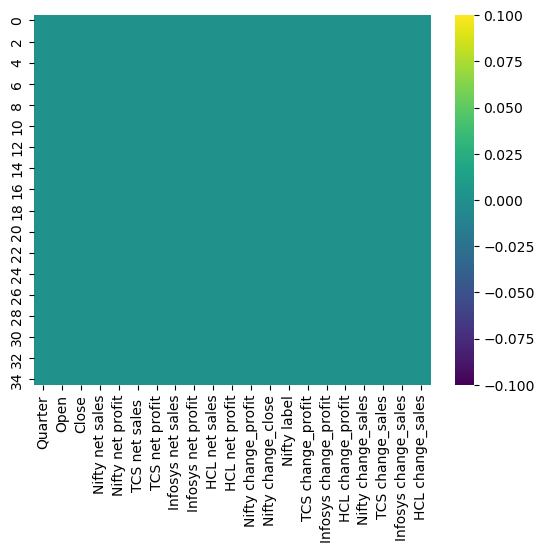

In [7]:
sns.heatmap(df.isnull(),cmap='viridis')

In [18]:
df_new.head()

,Quarter,Open,Nifty net sales,Nifty net profit,TCS net sales,TCS net profit,Infosys net sales,Infosys net profit,HCL net sales,HCL net profit,Nifty change_profit,Nifty change_close,Nifty label,TCS change_profit,Infosys change_profit,HCL change_profit,Nifty change_sales,TCS change_sales,Infosys change_sales,HCL change_sales
0,Dec-15,11120.83,8626165.33,890.69,21621.0,5991.0,13562.0,3163.0,4471.85,1649.66,0.00,0.00,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,Mar-16,10901.89,13640220.26,1225.26,22258.0,5728.0,14158.0,3391.0,4612.64,1671.51,37.56,-2.04,-1.0,-4.39,7.21,1.32,58.13,2.95,4.39,3.15
2,Jun-16,11233.45,12083445.94,1158.64,23087.0,5778.0,14420.0,3180.0,4608.80,1799.29,-5.44,3.13,1.0,0.87,-6.22,7.64,-11.41,3.72,1.85,-0.08
3,Sep-16,10769.15,13051316.13,1185.47,23016.0,5958.0,15000.0,3476.0,4705.77,1690.72,2.32,-4.31,-1.0,3.12,9.31,-6.03,8.01,-0.31,4.02,2.10
4,Dec-16,10033.53,13081942.31,1050.86,23184.0,6084.0,14949.0,3599.0,4889.26,1661.54,-11.35,-6.68,-1.0,2.11,3.54,-1.73,0.23,0.73,-0.34,3.90


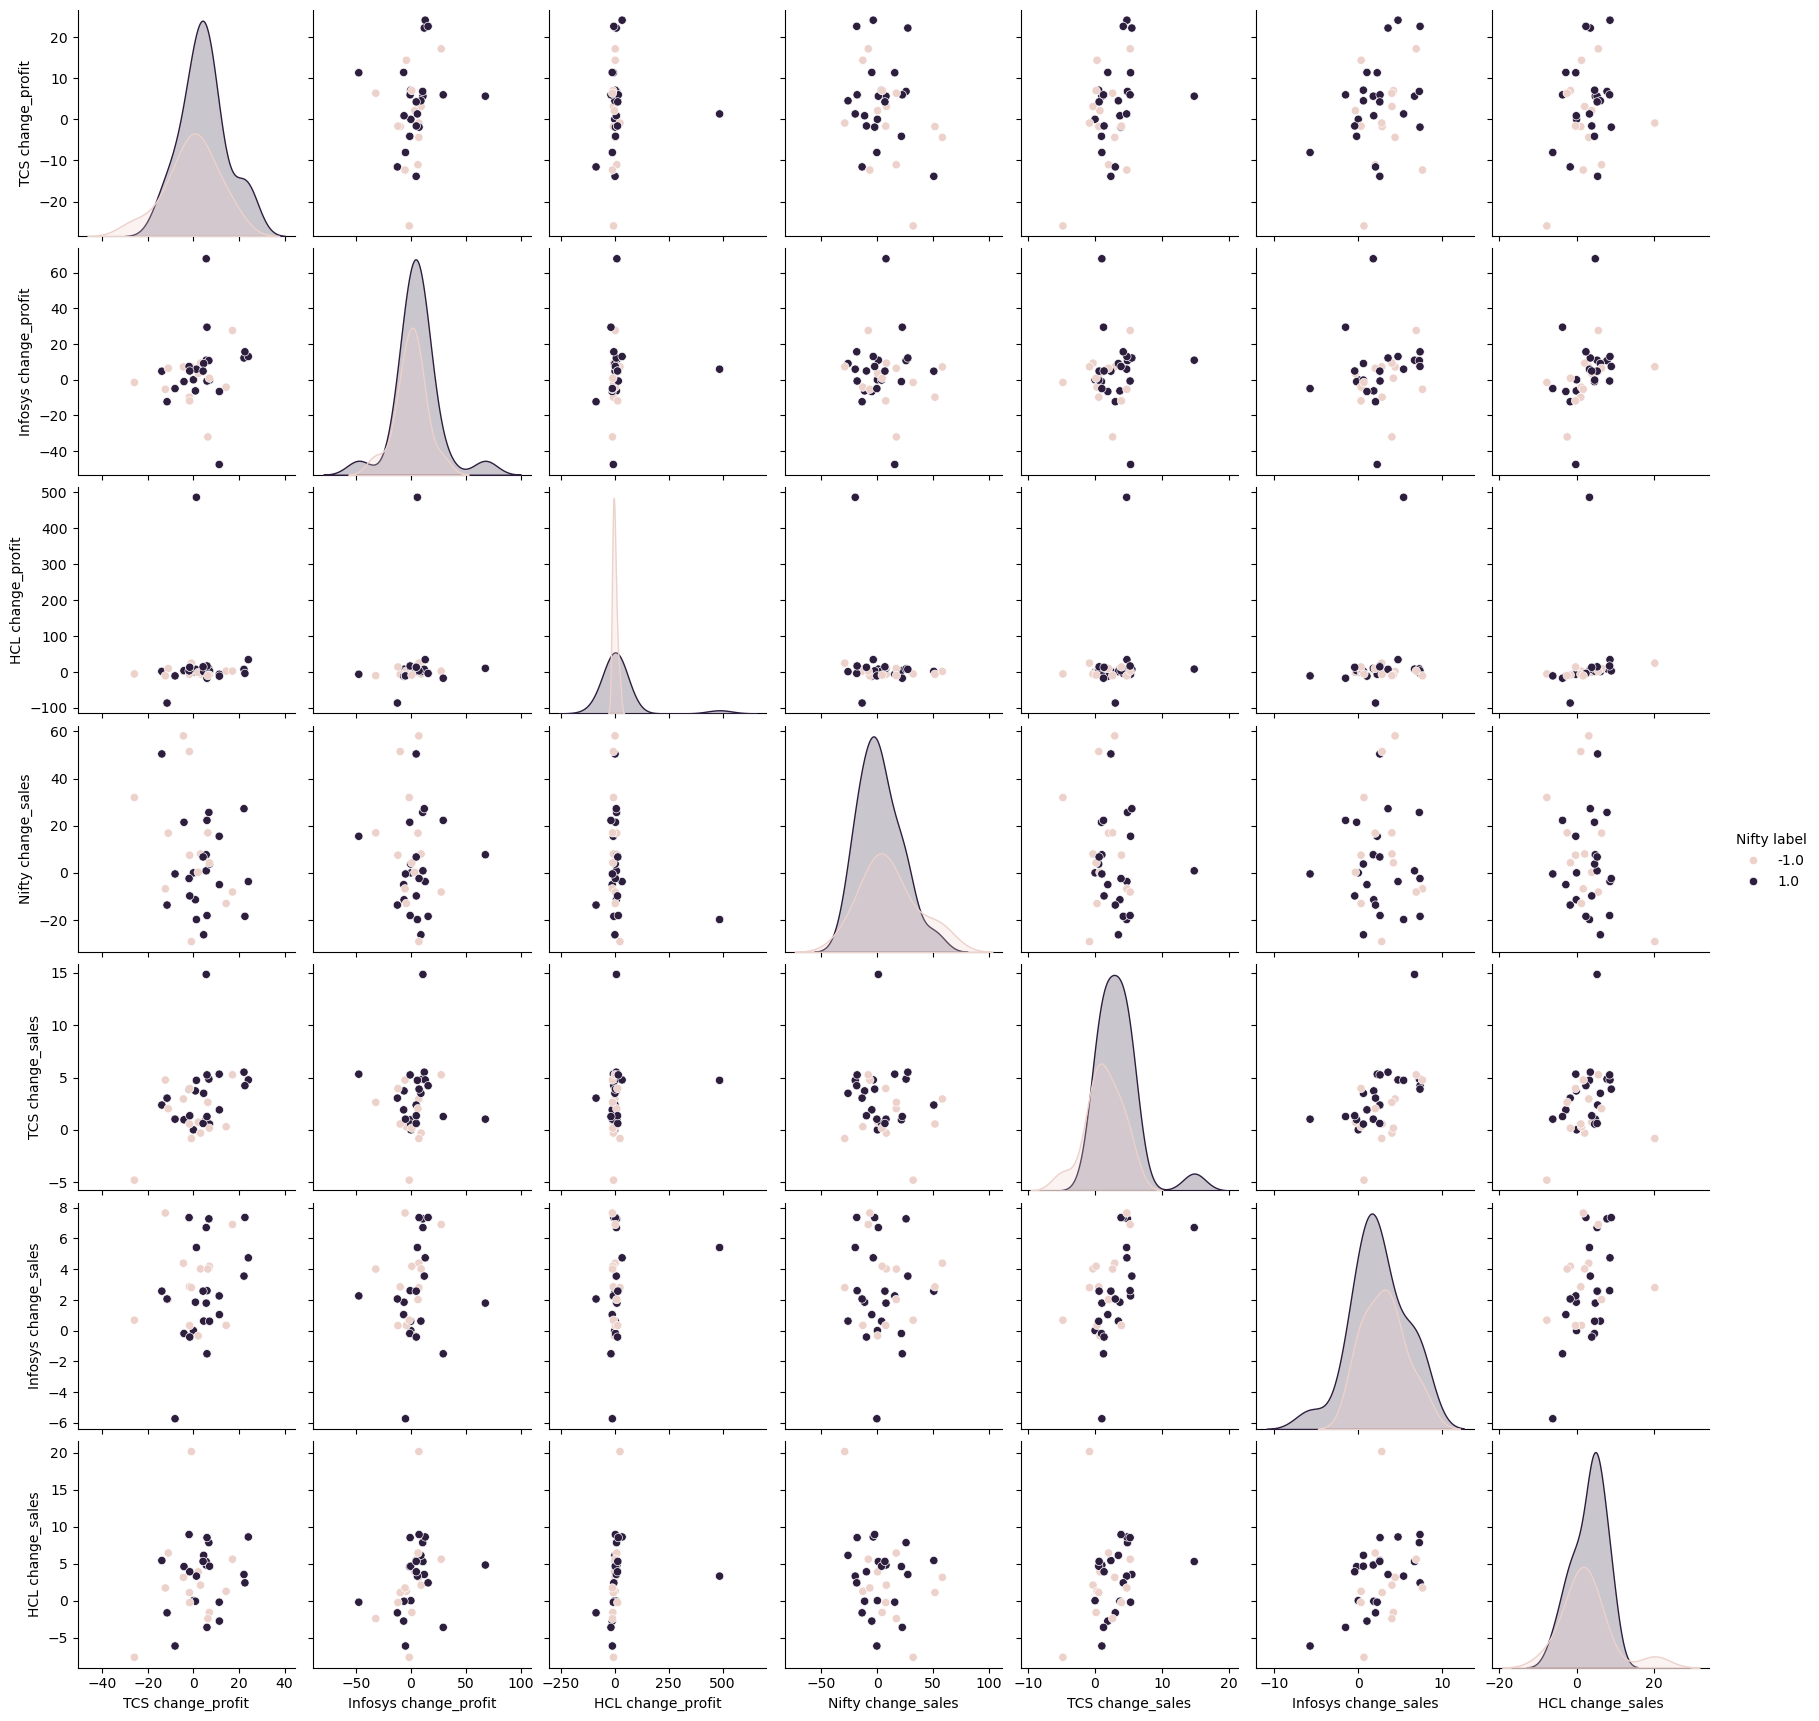

In [24]:
plt.rcParams['figure.figsize']=(8,8)
#sns.pairplot(df,hue='Nifty label', vars=['Open','Close','Nifty net sales','Nifty net profit','TCS net sales ','TCS net profit',
#                                   'Infosys net sales','Infosys net profit','HCL net sales','HCL net profit','Nifty change_profit',
#                                   'Nifty change_close','TCS change_profit','Infosys change_profit','HCL change_profit',
#                                   'Nifty change_sales','TCS change_sales','Infosys change_sales','HCL change_sales'])
sns.pairplot(df,hue='Nifty label', vars=['TCS change_profit','Infosys change_profit','HCL change_profit',
                                    'Nifty change_sales','TCS change_sales','Infosys change_sales','HCL change_sales'])
plt.savefig('/Users/ayushmohite/Downloads/3.jpg')

In [114]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming you have a DataFrame 'df' with your features
features = ['Open', 'Nifty net sales', 'Nifty net profit', 
            'TCS net sales ', 'TCS net profit', 'Infosys net sales', 
            'Infosys net profit', 'HCL net sales', 'HCL net profit', 
            'Nifty change_profit', 'Nifty change_close', 
            'TCS change_profit', 'Infosys change_profit', 'HCL change_profit', 
            'Nifty change_sales', 'TCS change_sales', 'Infosys change_sales', 
            'HCL change_sales', 'Last_close']

# Separate out the features
x = df_new[features]

# Standardize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Apply PCA
pca = PCA(n_components=0.95)
x_pca = pca.fit_transform(x_scaled)

# Display the amount of variance explained by each component
print(pca.explained_variance_ratio_)

# Create a DataFrame for the PCA components
pca_df = pd.DataFrame(data=x_pca, columns=[f'PC{i+1}' for i in range(x_pca.shape[1])])


[0.41431747 0.13912303 0.10824994 0.06961813 0.05684549 0.05124369
 0.04283243 0.03762426 0.02919381 0.02132267]


In [118]:
import pickle
filename='pca_model.pkl'
pickle.dump(pca, open(filename, 'wb'))

In [128]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import train_test_split
y = df['Nifty label'].replace({-1: 0, 1: 1})
X = pca_df
# Assuming `y` is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
xgboost_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, use_label_encoder=False)

# Train the model
xgboost_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xg = xgboost_model.predict(X_test)
y_pred_proba = xgboost_model.predict_proba(X_test)


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:10:42] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [136]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_xg)
print(f'Accuracy: {accuracy}')

# Calculate log loss
logloss = log_loss(y_test, y_pred_proba)
print(f'Log Loss: {logloss}')


Accuracy: 0.8571428571428571
Log Loss: 0.2991578219158156


In [134]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9]
}

grid_search = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False), param_grid, cv=5, scoring='neg_log_loss', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:16:22] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:16:22] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:16:22] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:16:23] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:16:23] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [20:16:23] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning

In [138]:
# Save the model using pickle
with open('xgboost_model.pkl', 'wb') as f:
    pickle.dump(xgboost_model, f)
